In [1]:
# Code for transfer learning Inceptionv3 for ucm dataset:

import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# load the Inceptionv3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False


87910968/87910968 [==============================] - 4s 0us/step


In [3]:
# add new classification layers
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(21, activation='softmax')(x)

# create the new model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# create image data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# load the training and validation data
train_data = train_datagen.flow_from_directory('/kaggle/input/landuse-scene-classification/images_train_test_val/train', target_size=(256, 256), batch_size=32, class_mode='categorical',shuffle=False)
val_data = test_datagen.flow_from_directory('/kaggle/input/landuse-scene-classification/images_train_test_val/validation', target_size=(256, 256), batch_size=32, class_mode='categorical',shuffle=False)

# train the model
ret_model=model.fit(train_data, epochs=10, validation_data=val_data)

Found 7350 images belonging to 21 classes.
Found 2100 images belonging to 21 classes.
Epoch 1/10
230/230 [==============================] - 135s 586ms/step - loss: 0.4238 - accuracy: 0.8521 - val_loss: 0.4420 - val_accuracy: 0.8443
Epoch 2/10
230/230 [==============================] - 133s 576ms/step - loss: 0.4179 - accuracy: 0.8546 - val_loss: 0.3781 - val_accuracy: 0.8805
Epoch 3/10
230/230 [==============================] - 134s 584ms/step - loss: 0.3827 - accuracy: 0.8729 - val_loss: 0.4677 - val_accuracy: 0.8457
Epoch 4/10
230/230 [==============================] - 133s 578ms/step - loss: 0.3921 - accuracy: 0.8663 - val_loss: 0.4000 - val_accuracy: 0.8633
Epoch 5/10
230/230 [==============================] - 132s 575ms/step - loss: 0.3543 - accuracy: 0.8780 - val_loss: 0.3419 - val_accuracy: 0.8943
Epoch 6/10
230/230 [==============================] - 132s 574ms/step - loss: 0.3364 - accuracy: 0.8844 - val_loss: 0.3202 - val_accuracy: 0.8943
Epoch 7/10
230/230 [==================

In [5]:
# evaluate the model
test_data = test_datagen.flow_from_directory('/kaggle/input/landuse-scene-classification/images_train_test_val/test', target_size=(256, 256), batch_size=32, class_mode='categorical',shuffle=False)
loss, acc = model.evaluate(test_data)
print('Test Accuracy: %.3f' % (acc * 100.0))

Found 1050 images belonging to 21 classes.
33/33 [==============================] - 12s 358ms/step - loss: 0.3971 - accuracy: 0.8676
Test Accuracy: 86.762


In [6]:
from sklearn.metrics import confusion_matrix , classification_report 
import seaborn as sns

In [8]:
train_generator = train_datagen.flow_from_directory('/kaggle/input/landuse-scene-classification/images_train_test_val/train', target_size=(224, 224), batch_size=32, class_mode='categorical',shuffle=False)
val_generator = test_datagen.flow_from_directory('/kaggle/input/landuse-scene-classification/images_train_test_val/validation', target_size=(224, 224), batch_size=32, class_mode='categorical',shuffle=False)
class_label=list(train_generator.class_indices.keys())

Found 7350 images belonging to 21 classes.
Found 2100 images belonging to 21 classes.


In [9]:
test_dataset = '/kaggle/input/landuse-scene-classification/images_train_test_val/test'
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 batch_size=32,
                                                 target_size = (256,256),
                                                 class_mode='categorical')

Found 1050 images belonging to 21 classes.


In [10]:
import numpy as np
model.evaluate(test_generator)
preds = model.predict(test_generator)
y_preds = np.argmax(preds , axis = 1 )
y_test = np.array(test_generator.labels)

33/33 [==============================] - 6s 151ms/step


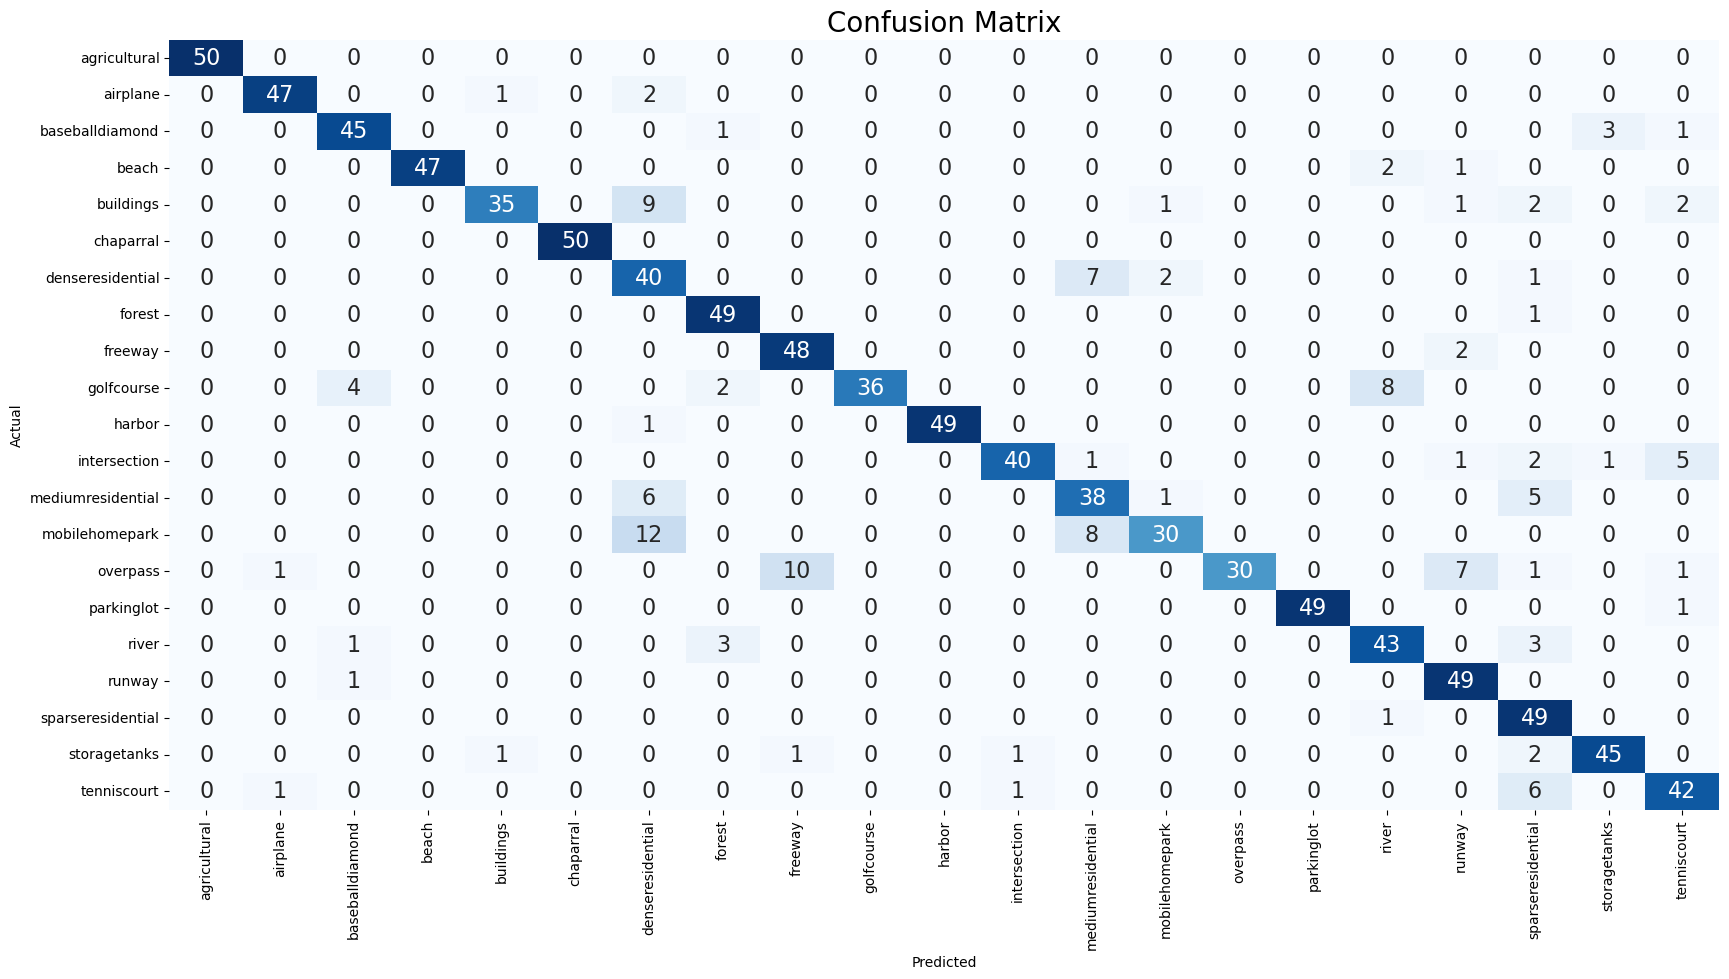

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
cm_data = confusion_matrix(y_test , y_preds)
cm = pd.DataFrame(cm_data, columns=class_label, index = class_label)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (20,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [12]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.88      0.90      0.89        50
           3       1.00      0.94      0.97        50
           4       0.95      0.70      0.80        50
           5       1.00      1.00      1.00        50
           6       0.57      0.80      0.67        50
           7       0.89      0.98      0.93        50
           8       0.81      0.96      0.88        50
           9       1.00      0.72      0.84        50
          10       1.00      0.98      0.99        50
          11       0.95      0.80      0.87        50
          12       0.70      0.76      0.73        50
          13       0.88      0.60      0.71        50
          14       1.00      0.60      0.75        50
          15       1.00      0.98      0.99        50
          16       0.80      0.86      0.83        50
          17       0.80    

In [13]:
history_dict = ret_model.history
train_acc = history_dict['loss']
val_acc = history_dict['val_loss']
epochs = range(1, len(history_dict['loss'])+1)
plt.plot(epochs, train_acc,'b', label='Training error')
plt.plot(epochs, val_acc,'b', color="orange", label='Validation error')
plt.title('Training and Validation error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

NameError: name 'ret_model' is not defined

In [ ]:
loss = ret_model.history['loss']
val_loss = ret_model.history['val_loss']  
accuracy = ret_model.history['accuracy']
val_accuracy = ret_model.history['val_accuracy']
epochs = range(len(ret_model.history['loss']))
plt.figure()
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show();